In [75]:
import scipy.stats
import numpy as np
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture

In [2]:
class Gaussian:
    
    def __init__(self, mean, std):
        
        self.mean = mean
        self.std = std
    
    def sample(self, size):
        
        return np.random.normal(self.mean, self.std, size)
    
    def pdf(self, x):
        
        return scipy.stats.norm.pdf(x, self.mean, self.std)

In [161]:
actual_mu_1 = 0.0
actual_sigma2_1 = 0.004 ** 2
actual_mu_2 = 0.075
actual_sigma2_2 = 0.01 ** 2

In [162]:
g1 = Gaussian(actual_mu_1, np.sqrt(actual_sigma2_1))
g2 = Gaussian(actual_mu_2, np.sqrt(actual_sigma2_2))

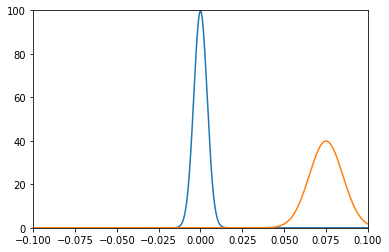

In [163]:
xx = numpy.linspace(-0.1, 0.1, 1000)

_ = plt.plot(xx, g1.pdf(xx))
_ = plt.plot(xx, g2.pdf(xx))

_ = plt.ylim(0, 100)
_ = plt.xlim(-0.1, 0.1)

In [164]:
samp1 = g1.sample(100)
samp2 = g2.sample(100)

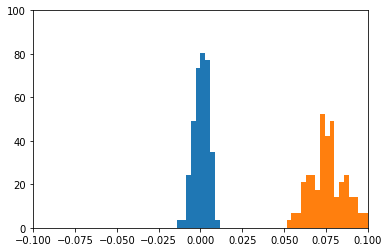

In [191]:
_ = plt.hist(samp1, range=(-0.1, 0.1), bins=70, density=True)
_ = plt.hist(samp2, range=(-0.1, 0.1), bins=70, density=True)

_ = plt.ylim(0, 100)
_ = plt.xlim(-0.1, 0.1)

In [192]:
gmm = GaussianMixture(n_components=2)

In [193]:
gmm.fit(np.hstack([samp1, samp2]).reshape(-1, 1))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

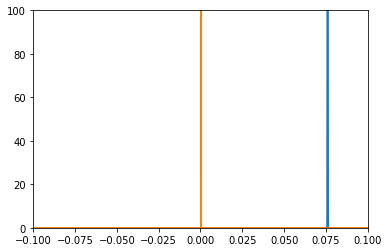

In [194]:
xx = numpy.linspace(-0.1, 0.1, 10000)

_ = plt.plot(xx, scipy.stats.norm.pdf(xx, gmm.means_[0,0], gmm.covariances_[0,0]))
_ = plt.plot(xx, scipy.stats.norm.pdf(xx, gmm.means_[1,0], gmm.covariances_[1,0]))

_ = plt.ylim(0, 100)
_ = plt.xlim(-0.1, 0.1)

In [195]:
gmm.means_

array([[0.07595861],
       [0.00035126]])

In [196]:
gmm.covariances_

array([[[1.01705901e-04]],

       [[2.12880164e-05]]])

In [197]:
gmm.weights_

array([0.5, 0.5])

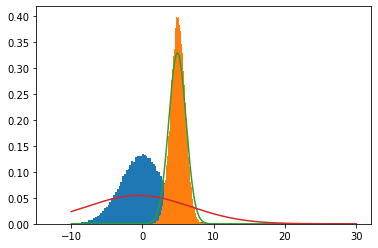

In [254]:
samp = np.random.normal(size=100000, scale=3)
samp = np.hstack([samp, np.random.normal(size=100000, loc=5, scale=1)])
gmm = GaussianMixture(n_components=2)
gmm.fit(samp.reshape(-1, 1))
xx = numpy.linspace(-10, 30, 10000)
_ = plt.hist(samp[:100000], density=True, bins=100)
_ = plt.hist(samp[100000:], density=True, bins=100)
_ = plt.plot(xx, scipy.stats.norm.pdf(xx, gmm.means_[0,0], gmm.covariances_[0,0]))
_ = plt.plot(xx, scipy.stats.norm.pdf(xx, gmm.means_[1,0], gmm.covariances_[1,0]))